In [1]:
#pip install pyinform
# !pip install pyrqa


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from pyts.image import RecurrencePlot
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf
from pyts.image import RecurrencePlot
import matplotlib.pyplot as plt

# Define the list of cryptocurrency symbols
crypto_symbols = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "SOL-USD", "XRP-USD", "USDC-USD", "ADA-USD", "AVAX-USD", "DOGE-USD",
                   "LINK-USD", "TRX-USD", "DOT-USD", "MATIC-USD", "TONCOIN-USD", "WBTC-USD", "ICP-USD", "SHIB-USD", "DAI-USD", "LTC-USD",
                   "BCH-USD", "LEO-USD", "UNI-USD", "ETC-USD", "ATOM-USD", "APT-USD", "XLM-USD", "XMR-USD", "IMX-USD", "TIA-USD", 
                   "OKB-USD", "NEAR-USD", "INJ-USD", "OP-USD", "FIL-USD", "FDUSD-USD", "LDO-USD", "HBAR-USD", "KAS-USD", "ARB-USD", 
                   "STX-USD", "CRO-USD", "VET-USD", "MNT-USD", "MKR-USD", "RNDR-USD", "SUI-USD", "SEI-USD", "GRT-USD", "RUNE-USD",
                   "HEX-USD", "ALGO-USD", "MINA-USD", "AAVE-USD", "QNT-USD", "HNT-USD", "ORDI-USD", "FLOW-USD", "ASTR-USD", "FTM-USD",
                   "THETA-USD", "SAND-USD", "AXS-USD", "XTZ-USD", "FLR-USD", "KCS-USD", "SNX-USD", "RON-USD", "CHZ-USD", "BGB-USD",
                   "SATS-USD", "BEAM-USD", "CHEEL-USD", "WEMIX-USD", "MANA-USD", "DYDX-USD", "CFX-USD", "ROSE-USD", "EOS-USD", "BTT-USD",
                   "FXS-USD", "NEO-USD", "OSMO-USD", "IOTA-USD", "KAVA-USD", "PYTH-USD", "JUP-USD", "BLUR-USD", "USDD-USD",
                   "MANTA-USD", "WBNB-USD", "PENDLE-USD", "KLAY-USD", "FRAX-USD", "BONK-USD", "WOO-USD", "CAKE-USD", "AKT-USD",
                   "MSOL-USD", "XDC-USD", "GALA-USD", "VBNB-USD", "XEC-USD", "LUNC-USD", "FTT-USD", "GNO-USD", "RPL-USD",
                   "AR-USD", "ENS-USD", "APE18876-USD", "XAUT-USD", "AXL17799-USD", "CRV-USD", "SC-USD", "NEXO-USD",
                   "CBETH-USD", "TWT-USD", "HT-USD", "GT-USD", "RLB-USD", "1INCH-USD", "FET-USD", "FTN-USD", "STRD-USD",
                   "COMP5692-USD", "GMT18069-USD", "PAXG-USD", "CSPR-USD", "XRD-USD", "LUNA20314-USD", "CORE23254-USD",
                   "NFT9816-USD", "GMX11857-USD", "BTG-USD", "ELF-USD", "ENJ-USD", "KUJI-USD", "PEPE24478-USD", "METIS-USD",
                   "IOTX-USD", "GAS-USD", "SKL-USD", "WKAVA-USD", "ZEC-USD", "USDP-USD", "AGIX-USD", "CELO-USD", "ZIL-USD",
                   "POKT-USD", "MAGIC14783-USD", "ALT29073-USD", "UMA-USD", "ORBR-USD", "BAT-USD", "HOT2682-USD", "KSM-USD",
                   "DASH-USD", "MASK8536-USD", "XEM-USD", "LRC-USD", "DESO-USD", "AZERO-USD", "PYUSD-USD", "QTUM-USD",
                   "HBTC-USD", "XCH-USD", "SSV-USD", "NTRN26680-USD", "TRB-USD", "SUPER8290-USD", "GLMR-USD", "ONDO-USD",
                   "API3-USD", "ETHW-USD", "SFP-USD", "MX-USD", "WLD-USD", "ILV-USD", "CVX-USD", "TRAC-USD", "ZRX-USD",
                   "TFUEL-USD", "BDX-USD", "ADF-USD", "FLOKI-USD", "RAY-USD", "JASMY-USD", "LYX-USD", "JST-USD"]

# Define start and end dates
end_date = '2024-03-01'
start_date = pd.to_datetime(end_date) - pd.DateOffset(days=365*10)

# Download historical data for the specified symbols and date range
crypto_data = yf.download(tickers=crypto_symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  189 of 189 completed


3 Failed downloads:
['MANTA-USD', 'ONDO-USD', 'ALT29073-USD']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [3]:
crypto_data

,1INCH-USD,AAVE-USD,ADA-USD,ADF-USD,AGIX-USD,AKT-USD,ALGO-USD,ALT29073-USD,APE18876-USD,API3-USD,...,XEC-USD,XEM-USD,XLM-USD,XMR-USD,XRD-USD,XRP-USD,XTZ-USD,ZEC-USD,ZIL-USD,ZRX-USD
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,0.496161,100.340874,0.591379,1.822369,0.758144,4.042106,0.207436,NaN,1.840918,3.889412,...,0.000033,0.038439,0.116442,129.174301,0.047349,0.542425,1.116651,27.715679,0.025575,0.370789
2024-02-26,0.495453,102.750137,0.619736,1.716804,0.726485,4.627492,0.211569,NaN,1.987547,4.033236,...,0.000035,0.039038,0.117967,129.613281,0.047846,0.551405,1.143506,28.107693,0.025947,0.372541
2024-02-27,0.488037,104.874298,0.624216,1.747348,0.664762,4.442046,0.208434,NaN,1.943650,4.140079,...,0.000035,0.039764,0.122972,130.061203,0.046623,0.586258,1.141203,28.742697,0.026186,0.379907


In [4]:
# crypto_data.stack()

In [5]:
### the ENTIRE duration of the timeseries

# import numpy as np
# import pandas as pd
# import yfinance as yf
# from pyts.image import RecurrencePlot
# import matplotlib.pyplot as plt


# # Apply recurrence plots for each symbol
# for symbol in crypto_symbols:
#     # Extract the time series data for the current symbol
#     time_series = crypto_data[symbol].dropna().values.reshape(1, -1)

#     # Create recurrence plot
#     rp = RecurrencePlot(dimension=1, time_delay=1, threshold=None)  # Set threshold to None or a specific value
#     recurrence_matrix = rp.fit_transform(time_series)

#     # Display the recurrence plot
#     plt.figure(figsize=(6, 6))
#     plt.imshow(recurrence_matrix[0], cmap='viridis', origin='lower')
#     plt.title(f'Recurrence Plot for {symbol}')
#     plt.xlabel('Time')
#     plt.ylabel('Time')
#     plt.show()


## 2023 RPs 

In [ ]:
# Set up subplots
num_symbols = len(crypto_symbols)
num_cols = 3  # Set the number of columns for subplots
num_rows = int(np.ceil(num_symbols / num_cols))

# Apply yearly recurrence plots for each symbol
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, symbol in enumerate(crypto_symbols):
    # Extract the time series data for the current symbol
    time_series = crypto_data[symbol].dropna().to_frame()

    # Ensure that the index is in datetime format
    time_series.index = pd.to_datetime(time_series.index)

    # Extract the years present in the data
    years = time_series.index.year.unique()

    for year in years:
        # Extract data for the current year
        yearly_data = time_series[time_series.index.year == year]

        # Skip symbols with insufficient data
        if yearly_data.size == 0:
            print(f"Skipping {symbol} for the year {year} due to insufficient data.")
            continue

        # Create recurrence plot
        rp = RecurrencePlot(dimension=1, time_delay=1, threshold=None)  # Set threshold to None or a specific value
        recurrence_matrix = rp.fit_transform(yearly_data.values.reshape(1, -1))

        # Display the recurrence plot in the corresponding subplot
        ax = axs[i // num_cols, i % num_cols]
        ax.imshow(recurrence_matrix[0], cmap='viridis', origin='lower')
        ax.set_title(f' {symbol} - {year}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Date')

# Adjust layout
plt.tight_layout()
plt.show()


## Every Coin - All Possible Years Recurrence Plots'

In [ ]:
# Set up subplots
num_symbols = len(crypto_symbols)
num_cols = 3  # Set the number of columns for subplots
num_rows = int(np.ceil(num_symbols / num_cols))

# Iterate through each symbol
for i, symbol in enumerate(crypto_symbols):
    # Extract the time series data for the current symbol
    time_series = crypto_data[symbol].dropna().to_frame()

    # Ensure that the index is in datetime format
    time_series.index = pd.to_datetime(time_series.index)

    # Extract the years present in the data
    years = time_series.index.year.unique()

    # Iterate through each year for the current symbol
    for year in years:
        # Extract data for the current year
        yearly_data = time_series[time_series.index.year == year]

        # Skip symbols with insufficient data
        if yearly_data.size == 0:
            print(f"Skipping {symbol} for the year {year} due to insufficient data.")
            continue

        # Create recurrence plot
        rp = RecurrencePlot(dimension=1, time_delay=1, threshold=None)  # Set threshold to None or a specific value
        recurrence_matrix = rp.fit_transform(yearly_data.values.reshape(1, -1))

        # Display the recurrence plot
        plt.imshow(recurrence_matrix[0], cmap='viridis', origin='lower')
        plt.title(f'Recurrence Plot for {symbol} - Year {year}')
        plt.xlabel('Date')
        plt.ylabel('Date')
        plt.show()


## RQA Measurements

In [8]:
# import numpy as np
# import pandas as pd
# import yfinance as yf
# from pyts.image import RecurrencePlot
# import matplotlib.pyplot as plt

# # Assuming you have yfinance and pyts installed
# # Install them using: pip install yfinance pyts

# # Define your crypto symbols and date range as you've done before
# crypto_symbols = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "SOL-USD", "XRP-USD", "USDC-USD", "ADA-USD", "AVAX-USD", "DOGE-USD",
#                    "LINK-USD", "TRX-USD", "DOT-USD", "MATIC-USD", "TONCOIN-USD", "WBTC-USD", "ICP-USD", "SHIB-USD", "DAI-USD", "LTC-USD",
#                    "ONDO-USD", "API3-USD", "ETHW-USD", "SFP-USD", "MX-USD", "WLD-USD", "ILV-USD", "CVX-USD", "TRAC-USD", "ZRX-USD",
#                    "TFUEL-USD", "BDX-USD", "ADF-USD", "FLOKI-USD", "RAY-USD", "JASMY-USD", "LYX-USD", "JST-USD"]

# end_date = '2023-09-27'
# start_date = pd.to_datetime(end_date) - pd.DateOffset(days=365*8)

# # Download historical data for the specified symbols and date range
# crypto_data = yf.download(tickers=crypto_symbols, start=start_date, end=end_date)['Adj Close']

# # Create an empty DataFrame to store features
# columns = ["Symbol", "Year", "Percentage of Recurrence", "Percentage of Determinism", "Average Diagonal Length",
#            "Trapping Time", "Laminarity", "Recurrence Rate", "Determinism", "Max Diagonal Length", "Divergence",
#            "Entropy of Diagonal Structures", "Trend of Recurrences", "Max Vertical Length", "Entropy of Vertical Structures",
#            "Mean Recurrence Time", "Recurrence Time Entropy", "Num Most Probable Recurrence Time"]
# feature_df = pd.DataFrame(columns=columns)

# # Iterate through each symbol
# for i, symbol in enumerate(crypto_symbols):
#     # Extract the time series data for the current symbol
#     time_series = crypto_data[symbol].dropna().to_frame()

#     # Ensure that the index is in datetime format
#     time_series.index = pd.to_datetime(time_series.index)

#     # Extract the years present in the data
#     years = time_series.index.year.unique()

#     # Iterate through each year for the current symbol
#     for year in years:
#         # Extract data for the current year
#         yearly_data = time_series[time_series.index.year == year]

#         # Skip symbols with insufficient data
#         if yearly_data.size == 0:
#             print(f"Skipping {symbol} for the year {year} due to insufficient data.")
#             continue

#         # Create recurrence plot
#         rp = RecurrencePlot(dimension=1, time_delay=1, threshold=None)
#         recurrence_matrix = rp.fit_transform(yearly_data.values.reshape(1, -1))[0]

#         # Calculate features
#         num_points = recurrence_matrix.size
#         num_recurrences = np.sum(recurrence_matrix)
#         percentage_recurrence = (num_recurrences / num_points) * 100
#         percentage_determinism = (np.sum(np.diagonal(recurrence_matrix)) / num_recurrences) * 100
#         average_diagonal_length = np.mean([len(np.where(np.diag(recurrence_matrix, k)[np.diag(recurrence_matrix, k) == 1])) for k in range(1, num_points)])
#         trapping_time = np.sum(np.sum(recurrence_matrix, axis=0) > 0)
#         laminarity = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
#         recurrence_rate = num_recurrences / (num_points * (num_points - 1))
#         determinism = np.sum(np.diag(recurrence_matrix)) / num_recurrences
#         max_diagonal_length = np.max([len(np.where(np.diag(recurrence_matrix, k)[np.diag(recurrence_matrix, k) == 1])) for k in range(1, num_points)])
#         divergence = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
#         entropy_diagonal = -np.sum(np.diag(recurrence_matrix) / num_points * np.log(np.diag(recurrence_matrix) / num_points))
#         trend = np.sum(np.abs(np.diff(np.diag(recurrence_matrix)))) / (num_points - 1)
#         laminarity = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
#         trapping_time = np.sum(np.sum(recurrence_matrix, axis=0) > 0)
#         max_vertical_length = np.max(np.sum(recurrence_matrix, axis=0))
#         entropy_vertical = -np.sum(np.sum(recurrence_matrix, axis=0) / num_points * np.log(np.sum(recurrence_matrix, axis=0) / num_points))
#         mean_recurrence_time = np.sum(np.sum(recurrence_matrix, axis=1) / num_points)
#         recurrence_time_entropy = -np.sum(np.sum(recurrence_matrix, axis=1) / num_points * np.log(np.sum(recurrence_matrix, axis=1) / num_points))
#         num_most_probable_recurrence_time = np.argmax(np.sum(recurrence_matrix, axis=1))

#         new_row = {
#             "Symbol": symbol,
#             "Year": year,
#             "Percentage of Recurrence": percentage_recurrence,
#             "Percentage of Determinism": percentage_determinism,
#             "Average Diagonal Length": average_diagonal_length,
#             "Trapping Time": trapping_time,
#             "Laminarity": laminarity,
#             "Recurrence Rate": recurrence_rate,
#             "Determinism": determinism,
#             "Max Diagonal Length": max_diagonal_length,
#             "Divergence": divergence,
#             "Entropy of Diagonal Structures": entropy_diagonal,
#             "Trend of Recurrences": trend,
#             "Max Vertical Length": max_vertical_length,
#             "Entropy of Vertical Structures": entropy_vertical,
#             "Mean Recurrence Time": mean_recurrence_time,
#             "Recurrence Time Entropy": recurrence_time_entropy,
#             "Num Most Probable Recurrence Time": num_most_probable_recurrence_time
#         }

#         feature_df = pd.concat([feature_df, pd.DataFrame([new_row])], ignore_index=True)

# print(feature_df)

In [9]:
# # Create an empty DataFrame to store features
# columns = ["Symbol", "Year", "Percentage of Recurrence",
#            "Trapping Time", "Laminarity", "Recurrence Rate", "Divergence", "Max Vertical Length", "Divergence",
#            "Mean Recurrence Time", "Recurrence Time Entropy", "Num Most Probable Recurrence Time"]
# feature_df = pd.DataFrame(columns=columns)

# # Iterate through each symbol
# for i, symbol in enumerate(crypto_symbols):
#     # Extract the time series data for the current symbol
#     time_series = crypto_data[symbol].dropna().to_frame()

#     # Ensure that the index is in datetime format
#     time_series.index = pd.to_datetime(time_series.index)

#     # Extract the years present in the data
#     years = time_series.index.year.unique()

#     # Iterate through each year for the current symbol
#     for year in years:
#         # Extract data for the current year
#         yearly_data = time_series[time_series.index.year == year]

#         # Skip symbols with insufficient data
#         if yearly_data.size == 0:
#             print(f"Skipping {symbol} for the year {year} due to insufficient data.")
#             continue

#         # Create recurrence plot
#         rp = RecurrencePlot(dimension=1, time_delay=1, threshold=None)
#         recurrence_matrix = rp.fit_transform(yearly_data.values.reshape(1, -1))[0]

#         # Calculate features
#         num_points = recurrence_matrix.size
#         num_recurrences = np.sum(recurrence_matrix)
#         percentage_recurrence = (num_recurrences / num_points) * 100
#         trapping_time = np.sum(np.sum(recurrence_matrix, axis=0) > 0)
#         laminarity = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
#         recurrence_rate = num_recurrences / (num_points * (num_points - 1))
#         divergence = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
#         max_vertical_length = np.max(np.sum(recurrence_matrix, axis=0))
#         entropy_vertical = -np.sum(np.sum(recurrence_matrix, axis=0) / num_points * np.log(np.sum(recurrence_matrix, axis=0) / num_points))
#         mean_recurrence_time = np.sum(np.sum(recurrence_matrix, axis=1) / num_points)
#         recurrence_time_entropy = -np.sum(np.sum(recurrence_matrix, axis=1) / num_points * np.log(np.sum(recurrence_matrix, axis=1) / num_points))
#         num_most_probable_recurrence_time = np.argmax(np.sum(recurrence_matrix, axis=1))

#         # Append features to DataFrame
#         new_row = {
#             "Symbol": symbol,
#             "Year": year,
#             "Percentage of Recurrence": percentage_recurrence,
#             "Trapping Time": trapping_time,
#             "Laminarity": laminarity,
#             "Recurrence Rate": recurrence_rate,
#             "Divergence": divergence,
#             "Max Vertical Length": max_vertical_length,
#             "Entropy of Vertical Structures": entropy_vertical,
#             "Mean Recurrence Time": mean_recurrence_time,
#             "Recurrence Time Entropy": recurrence_time_entropy,
#             "Num Most Probable Recurrence Time": num_most_probable_recurrence_time
#         }

#         # feature_df = pd.concat([feature_df, pd.DataFrame([new_row])], ignore_index=True)
#         # Reset index for each DataFrame before concatenating
#         feature_df = pd.concat([feature_df.reset_index(drop=True), pd.DataFrame([new_row]).reset_index(drop=True)], ignore_index=True)


# # Display the DataFrame
# (feature_df)


# Create an empty DataFrame to store features
columns = ["Symbol", "Year", "Percentage of Recurrence",
           "Trapping Time", "Laminarity", "Recurrence Rate", "Divergence", "Max Vertical Length", "Entropy of Vertical Structures",
           "Mean Recurrence Time", "Recurrence Time Entropy", "Num Most Probable Recurrence Time"]
feature_df = pd.DataFrame(columns=columns)

# Iterate through each symbol
for i, symbol in enumerate(crypto_symbols):
    # Extract the time series data for the current symbol
    time_series = crypto_data[symbol].dropna().to_frame()

    # Ensure that the index is in datetime format
    time_series.index = pd.to_datetime(time_series.index)

    # Extract the years present in the data
    years = time_series.index.year.unique()

    # Iterate through each year for the current symbol
    for year in years:
        # Extract data for the current year
        yearly_data = time_series[time_series.index.year == year]

        # Skip symbols with insufficient data
        if yearly_data.size == 0:
            print(f"Skipping {symbol} for the year {year} due to insufficient data.")
            continue

        # Create recurrence plot
        rp = RecurrencePlot(dimension=1, time_delay=1, threshold=None)
        recurrence_matrix = rp.fit_transform(yearly_data.values.reshape(1, -1))[0]

        # Calculate features
        num_points = recurrence_matrix.size
        num_recurrences = np.sum(recurrence_matrix)
        percentage_recurrence = (num_recurrences / num_points) * 100
        trapping_time = np.sum(np.sum(recurrence_matrix, axis=0) > 0)
        laminarity = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
        recurrence_rate = num_recurrences / (num_points * (num_points - 1))
        divergence = np.sum(np.sum(recurrence_matrix, axis=1) > 0) / num_points
        max_vertical_length = np.max(np.sum(recurrence_matrix, axis=0))
        entropy_vertical = -np.sum(np.sum(recurrence_matrix, axis=0) / num_points * np.log(np.sum(recurrence_matrix, axis=0) / num_points))
        mean_recurrence_time = np.sum(np.sum(recurrence_matrix, axis=1) / num_points)
        recurrence_time_entropy = -np.sum(np.sum(recurrence_matrix, axis=1) / num_points * np.log(np.sum(recurrence_matrix, axis=1) / num_points))
        num_most_probable_recurrence_time = np.argmax(np.sum(recurrence_matrix, axis=1))

        # Append features to DataFrame
        new_row = {
            "Symbol": symbol,
            "Year": year,
            "Percentage of Recurrence": percentage_recurrence,
            "Trapping Time": trapping_time,
            "Laminarity": laminarity,
            "Recurrence Rate": recurrence_rate,
            "Divergence": divergence,  # Corrected column name
            "Max Vertical Length": max_vertical_length,
            "Entropy of Vertical Structures": entropy_vertical,
            "Mean Recurrence Time": mean_recurrence_time,
            "Recurrence Time Entropy": recurrence_time_entropy,
            "Num Most Probable Recurrence Time": num_most_probable_recurrence_time
        }

        feature_df = pd.concat([feature_df, pd.DataFrame([new_row])], ignore_index=True)
        # Reset index for each DataFrame before concatenating
        # feature_df = pd.concat([feature_df.reset_index(drop=True), pd.DataFrame([new_row]).reset_index(drop=True)], ignore_index=True)

# Display the DataFrame
print(feature_df)


C:\Users\ameiy\AppData\Local\Temp\ipykernel_17796\2966225173.py:132: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_df = pd.concat([feature_df, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\ameiy\AppData\Local\Temp\ipykernel_17796\2966225173.py:111: RuntimeWarning: divide by zero encountered in log
  entropy_vertical = -np.sum(np.sum(recurrence_matrix, axis=0) / num_points * np.log(np.sum(recurrence_matrix, axis=0) / num_points))
C:\Users\ameiy\AppData\Local\Temp\ipykernel_17796\2966225173.py:111: RuntimeWarning: invalid value encountered in multiply
  entropy_vertical = -np.sum(np.sum(recurrence_matrix, axis=0) / num_points * np.log(np.sum(recurrence_matrix, axis=0) / num_points))
C:\Users\ameiy\AppData\Local\Temp\ipykernel_

      Symbol  Year  Percentage of Recurrence Trapping Time  Laminarity  \
0    BTC-USD  2014               3431.107448           106    0.009434   
1    BTC-USD  2015               5839.122796           365    0.002740   
2    BTC-USD  2016              15616.514412           366    0.002732   
3    BTC-USD  2017             381443.303921           365    0.002740   
4    BTC-USD  2018             256302.310096           365    0.002740   
..       ...   ...                       ...           ...         ...   
964  JST-USD  2020                  1.878642           239    0.004184   
965  JST-USD  2021                  3.270497           365    0.002740   
966  JST-USD  2022                  1.706623           365    0.002740   
967  JST-USD  2023                  0.453001           365    0.002740   
968  JST-USD  2024                  0.227093            60    0.016667   

     Recurrence Rate  Divergence  Max Vertical Length  \
0       3.053945e-03    0.009434         9.925939e+03 

In [10]:
feature_df

,Symbol,Year,Percentage of Recurrence,Trapping Time,Laminarity,Recurrence Rate,Divergence,Max Vertical Length,Entropy of Vertical Structures,Mean Recurrence Time,Recurrence Time Entropy,Num Most Probable Recurrence Time
0,BTC-USD,2014,3431.107448,106,0.009434,3.053945e-03,0.009434,9.925939e+03,37.032076,34.311074,37.032076,0
1,BTC-USD,2015,5839.122796,365,0.002740,4.382936e-04,0.002740,7.039669e+04,99.560676,58.391228,99.560676,348
2,BTC-USD,2016,15616.514412,366,0.002732,1.165803e-03,0.002732,1.491189e+05,127.607009,156.165144,127.607009,362
3,BTC-USD,2017,381443.303921,365,0.002740,2.863173e-02,0.002740,5.654349e+06,-9532.144621,3814.433039,-9532.144621,349
4,BTC-USD,2018,256302.310096,365,0.002740,1.923845e-02,0.002740,3.633466e+06,-5261.430666,2563.023101,-5261.430666,5
...,...,...,...,...,...,...,...,...,...,...,...,...
964,JST-USD,2020,1.878642,239,0.004184,3.288940e-07,0.004184,1.275647e+01,0.176278,0.018786,0.176278,97
965,JST-USD,2021,3.270497,365,0.002740,2.454886e-07,0.002740,3.877119e+01,0.301972,0.032705,0.301972,104
966,JST-USD,2022,1.706623,365,0.002740,1.281017e-07,0.002740,1.739704e+01,0.169120,0.017066,0.169120,90
967,JST-USD,2023,0.453001,365,0.002740,3.400293e-08,0.002740,4.806165e+00,0.050976,0.004530,0.050976,304


## Clustering

c:\Users\ameiy\anaconda3\envs\ML4AlgoTrading\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


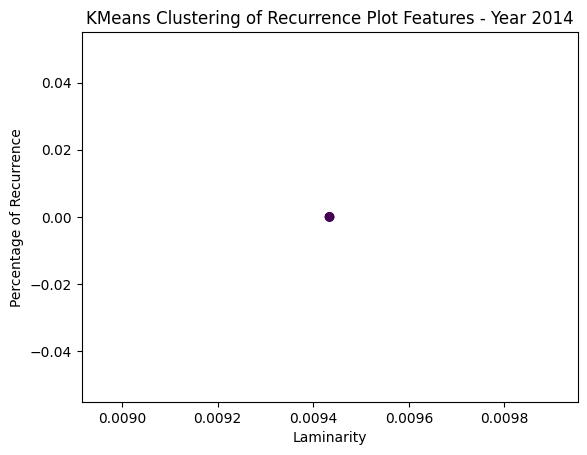

Year 2014 - Coins in Each Cluster:    Cluster  NumCoins
0        0         2


C:\Users\ameiy\AppData\Local\Temp\ipykernel_17796\1930070357.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustered_df = pd.concat([clustered_df, year_data])


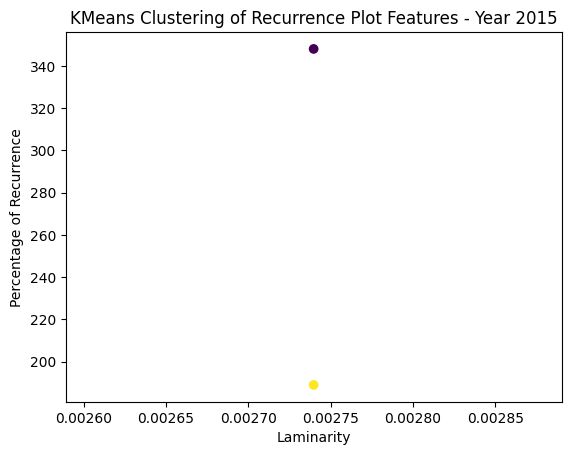

Year 2015 - Coins in Each Cluster:    Cluster  NumCoins
0        0         1
1        1         1


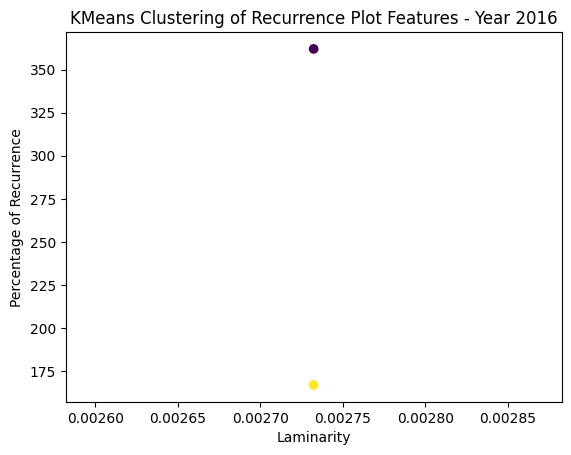

Year 2016 - Coins in Each Cluster:    Cluster  NumCoins
0        0         1
1        1         1


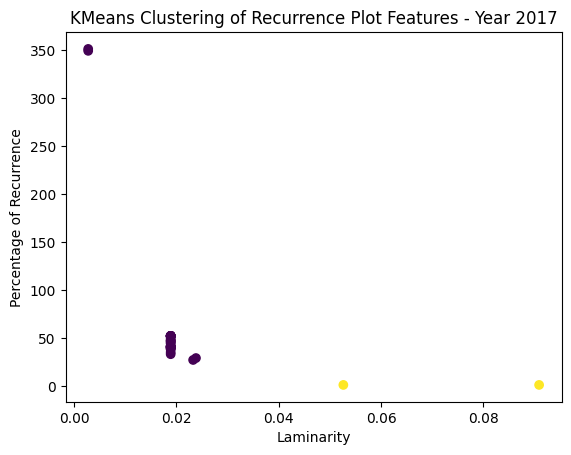

Year 2017 - Coins in Each Cluster:    Cluster  NumCoins
0        0        34
1        1         2


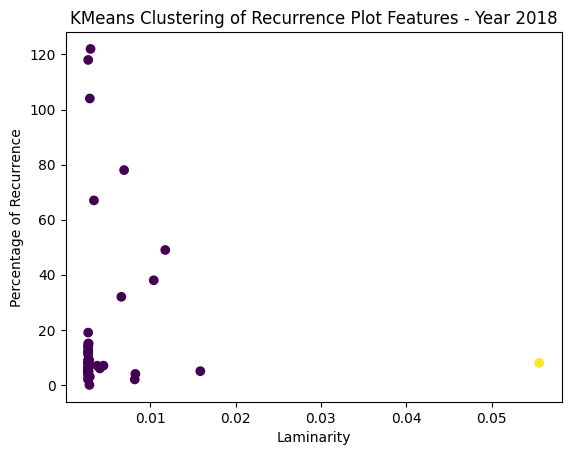

Year 2018 - Coins in Each Cluster:    Cluster  NumCoins
0        0        52
1        1         1


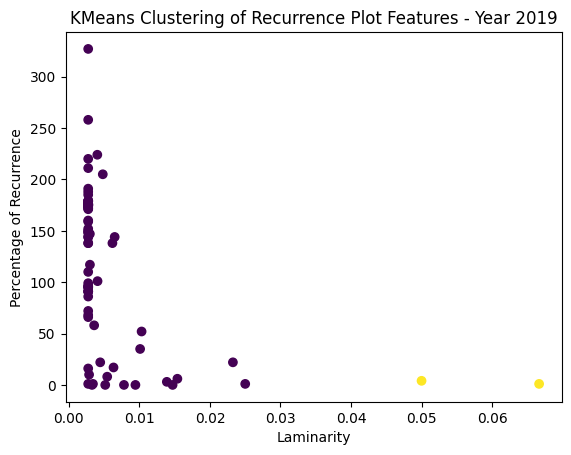

Year 2019 - Coins in Each Cluster:    Cluster  NumCoins
0        0        77
1        1         2


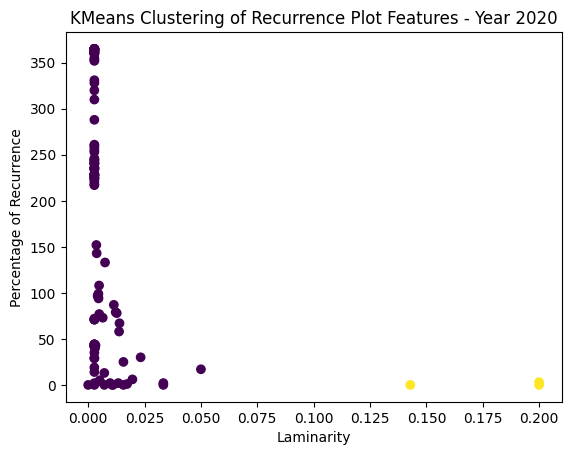

Year 2020 - Coins in Each Cluster:    Cluster  NumCoins
0        0       112
1        1         3


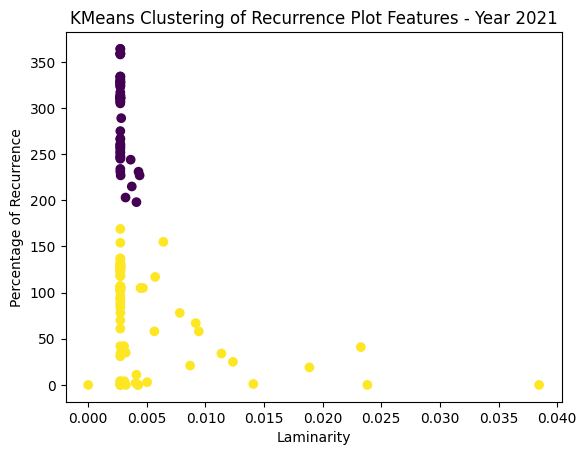

Year 2021 - Coins in Each Cluster:    Cluster  NumCoins
0        0        59
1        1        90


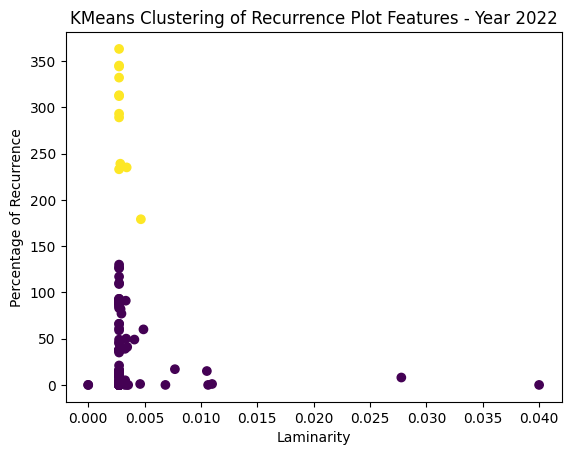

Year 2022 - Coins in Each Cluster:    Cluster  NumCoins
0        0       158
1        1        12


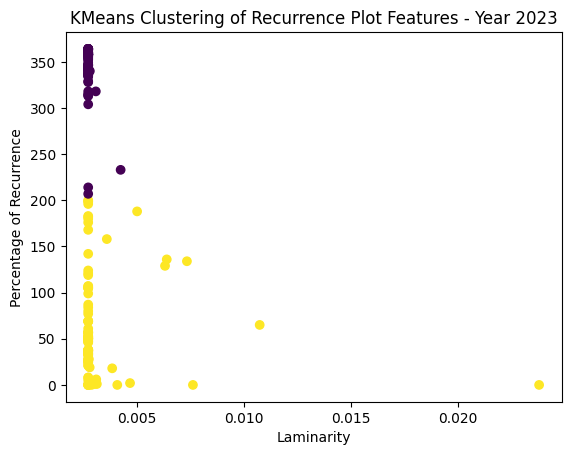

Year 2023 - Coins in Each Cluster:    Cluster  NumCoins
0        0        81
1        1       100


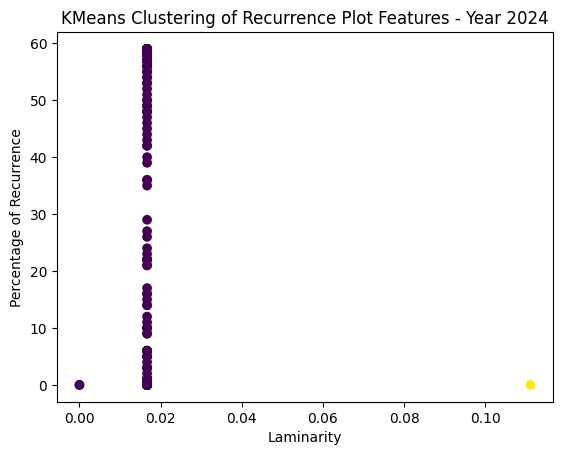

Year 2024 - Coins in Each Cluster:    Cluster  NumCoins
0        0       179
1        1         1


,Year,Laminarity,Num Most Probable Recurrence Time,Cluster
0,2014,0.009434,0,0
126,2014,0.009434,0,0
1,2015,0.002740,348,0
127,2015,0.002740,189,1
2,2016,0.002732,362,0
...,...,...,...,...
953,2024,0.016667,58,0
957,2024,0.016667,1,0
961,2024,0.016667,58,0
963,2024,0.016667,16,0


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'Symbol', 'Year', 'Laminarity', and 'Entropy of Vertical Structures' columns are present in feature_df

# Extracting relevant columns for clustering
selected_columns = ['Year', 'Laminarity', 'Num Most Probable Recurrence Time']
clustering_data = feature_df[selected_columns]

# Handling NaN values by filling them with the mean of each column
clustering_data = clustering_data.fillna(clustering_data.mean())

# Standardize the features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data.iloc[:, 1:])

# Choosing the number of clusters (you can adjust this based on your specific needs)
num_clusters = 2

# Create a new DataFrame to store cluster information
clustered_df = pd.DataFrame(columns=selected_columns + ['Cluster'])

# Iterate through each year and perform clustering
for year in clustering_data['Year'].unique():
    year_data = clustering_data[clustering_data['Year'] == year].copy()
    year_data_scaled = clustering_data_scaled[year_data.index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # Explicitly setting n_init
    year_data['Cluster'] = kmeans.fit_predict(year_data_scaled)

    # Visualizing the clusters for each year
    plt.scatter(year_data['Laminarity'], year_data['Num Most Probable Recurrence Time'], c=year_data['Cluster'], cmap='viridis')
    plt.title(f'KMeans Clustering of Recurrence Plot Features - Year {year}')
    plt.xlabel('Laminarity')
    plt.ylabel('Percentage of Recurrence')
    plt.show()

    # Displaying coins in each cluster for the current year
    coins_in_clusters = year_data.groupby('Cluster').size().reset_index(name='NumCoins')
    print(f'Year {year} - Coins in Each Cluster: {coins_in_clusters}')

    # Concatenate the results to the overall clustered_df
    clustered_df = pd.concat([clustered_df, year_data])

# Print the final overall clustered_df
(clustered_df)


In [13]:
import pandas as pd

# Assuming feature_df is your DataFrame
# Replace 'feature_df' with the actual name of your DataFrame

feature_df.to_csv(r'C:\Users\ameiy\Documents\feature_df_2024.csv', index=False)
